In [1]:
library(ctsem)
library(dplyr)
library(plyr)

Warning message:
"le package 'ctsem' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
ctsem also changes in time, for manual run ctDocs(), for blog see https://cdriver.netlify.app/, for citation info run citation('ctsem'), for original OpenMx functionality install.packages('ctsemOMX'), and for discussion https://github.com/cdriveraus/ctsem/discussions

Warning message in doTryCatch(return(expr), name, parentenv, handler):
"The following important packages for ctsem are out of date: rstan, ctsem"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.2"

Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'plyr' a été compilé avec la version R 4.1.2"
---------------------------

In [2]:
setwd("G:/VPHI/Welfare/2- Research Projects/Camille Montalcini/Origins.GS/DataOutput/TrackingSystem/EXP2_")

# Download data

In [3]:
path_save = file.path('LongformatModels')
dir.create(path_save)
df = read.csv('df_longformatALL.csv', header = TRUE, sep = ",")
df$HenID = as.factor(df$HenID)   
#df$id = as.factor(df$id)    #otherwise original and new ID differ
df$ExperimentID = as.factor(df$ExperimentID) 
#df$Is_notrelocated = abs(df$Is_relocated-1)
#tme is for now week of age
summary(df)
print(dim(df))
head(df)
#describe(df)

Warning message in dir.create(path_save):
"'LongformatModels' existe déjà"


     HAID                    HenID         PenID                 id       
 Length:2246        EXP3_hen_101:  12   Length:2246        Min.   :  1.0  
 Class :character   EXP3_hen_103:  12   Class :character   1st Qu.: 54.0  
 Mode  :character   EXP3_hen_104:  12   Mode  :character   Median :155.0  
                    EXP3_hen_105:  12                      Mean   :163.5  
                    EXP3_hen_106:  12                      3rd Qu.:262.0  
                    EXP3_hen_109:  12                      Max.   :376.0  
                    (Other)     :2174                                     
  MonthInstudy       DOAHA           IsOFH        ExperimentID  Is_relocated   
 Min.   :0.000   Min.   :148.0   Min.   :0.0000   Exp1:811     Min.   :0.0000  
 1st Qu.:0.820   1st Qu.:173.0   1st Qu.:0.0000   Exp2:801     1st Qu.:0.0000  
 Median :3.120   Median :243.0   Median :0.0000   Exp3:634     Median :0.0000  
 Mean   :3.503   Mean   :254.6   Mean   :0.1857                Mean   :0.1736  


[1] 2246   26


,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
,<chr>,<fct>,<chr>,<int>,<dbl>,<int>,<int>,<fct>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,created,EXP3_hen_93,pen4,1,0.00,148,0,Exp3,0,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,HA2B,EXP3_hen_93,pen4,1,0.95,177,0,Exp3,0,1,...,0.07763253,0.1742291,0.06714536,0.2143261,2.270833,1.056667,0.9707686,0,0,NA
3,HA3B,EXP3_hen_93,pen4,1,1.64,198,0,Exp3,0,1,...,0.07617498,0.3239533,0.10082141,0.1317688,2.437500,1.040000,0.8468724,19,1,NA
4,HA4B,EXP3_hen_93,pen4,1,2.53,225,0,Exp3,0,1,...,0.11966637,0.2696165,0.33903806,0.0745669,3.350000,1.004000,0.5514076,10,0,NA
5,HA5B,EXP3_hen_93,pen4,1,3.48,254,0,Exp3,0,1,...,0.08249680,0.2756794,0.15738827,0.1579139,1.875000,1.018333,0.7717222,9,0,NA
6,HA7B,EXP3_hen_93,pen4,1,5.82,325,0,Exp3,0,1,...,0.07141513,0.1976381,0.21906863,0.2142265,2.979167,1.006667,0.7026734,18,0,NA


In [4]:
unique(df$HAID)

[1] "created" "HA2B"    "HA3B"    "HA4B"    "HA5B"    "HA7B"    "HA8B"   
 [8] "HA9B"    "HA1B"    "HA6B"    "HA10B"   "HA11B"   "HA1A"    "HA2A"   
[15] "HA3A"    "HA5A"    "HA6A"    "HA7A"    "HA8A"    "HA9A"    "HA11A"  
[22] "HA4A"    "HA10A"   "HA1"     "HA2"     "HA3"     "HA4"     "HA5"

In [5]:
colnames(df)

[1] "HAID"                   "HenID"                  "PenID"                 
 [4] "id"                     "MonthInstudy"           "DOAHA"                 
 [7] "IsOFH"                  "ExperimentID"           "Is_relocated"          
[10] "Dataset1"               "Dataset2"               "Dataset3"              
[13] "early_death"            "time2event"             "meanDOAmvt"            
[16] "PropZ5"                 "PropZ4"                 "PropZ3"                
[19] "PropZ2"                 "PropZ1"                 "VTDperhour"            
[22] "zonecrossed2transition" "unevenness"             "severity"              
[25] "gap"                    "weight"

In [6]:
#TODO on final model, only relevant when optimize=FALSE, 
iter_ = 2000 
chains_ = 2 
bool_optimize = TRUE #documentation FALSE: "which also mean intoverpop will be set to FALSE automatically and therefore we integrates over 
#full sampling rather than population distribution of parameters"
#number of cpu cores to use to speed up
cores_ = 5 
folds_ = 3

# Hierarchical Bayesian continuous time dynamic model - MVT & KBF

In [7]:
#initialise what we want
variable = 'PropZ5' #VTDperhour PropZ5 zonecrossed2transition unevenness

In [8]:
#head(df[,c('ExperimentID','IsOFH', 'Is_relocated','Dataset1','Dataset2','Dataset3')],2)

In [9]:
############ 
name = paste0(variable, '_KBF_trend_rs0NEW_')
print(name)
#data_mvtha = subset(df,df$HAID!='created')
#data_mvtha = data_mvtha %>% select (id, MonthInstudy, severity, VTDperhour)
data_mvtha = df[,c('id', 'MonthInstudy', 'severity', variable,'IsOFH','Dataset1','Dataset3','weight','Is_relocated')]
#data_mvtha = plyr::rename(data_mvtha, c('MonthInstudy'='time',"severity"="Y1", "VTDperhour"="Y2"))
#data_mvtha$Y1 = sqrt(data_mvtha$Y1)

#create directory
path_save_ = file.path(path_save,name)
dir.create(path_save_)
#convert into double (integer leads to warning as Y1 and Y2 are double)
#without centered TI: we get a warning: "Uncentered TI predictors noted -- interpretability may be hindered and default priors 
#may not be appropriate"
#centering and scaling variables in the model
li_sc = c('severity',variable)
data_mvtha[,li_sc] = scale(data_mvtha[,li_sc]) 
#warning if we have double and integer, and as Y1 and Y2 are double, let set them all
data_mvtha[li_sc] = sapply(data_mvtha[li_sc],as.double)
data_mvtha[c('IsOFH','Dataset1','Dataset3','Is_relocated')] = sapply(data_mvtha[c('IsOFH','Dataset1','Dataset3','Is_relocated')],as.double)

#pearson correlation
df_ = na.omit(data_mvtha[,c('MonthInstudy','severity', variable)])
dim(df_)
round(cor(df_[,c('MonthInstudy','severity', variable)], method = c("pearson")), 2)
round(cor(df_[,c('MonthInstudy','severity', variable)], method = c("spearman")), 2)
#show info
dim(data_mvtha)
head(data_mvtha,2)
summary(data_mvtha)
str(data_mvtha)

[1] "PropZ5_KBF_trend_rs0NEW_"


[1] 1889    3

,MonthInstudy,severity,PropZ5
MonthInstudy,1.00,0.50,0.08
severity,0.50,1.00,0.25
PropZ5,0.08,0.25,1.00


,MonthInstudy,severity,PropZ5
MonthInstudy,1.00,0.61,0.10
severity,0.61,1.00,0.19
PropZ5,0.10,0.19,1.00


[1] 2246    9

,id,MonthInstudy,severity,PropZ5,IsOFH,Dataset1,Dataset3,weight,Is_relocated
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00,NA,NA,0,1,0,NA,0
2,1,0.95,-0.9249282,0.684209,0,1,0,NA,0


       id         MonthInstudy      severity           PropZ5       
 Min.   :  1.0   Min.   :0.000   Min.   :-0.9249   Min.   :-1.0896  
 1st Qu.: 54.0   1st Qu.:0.820   1st Qu.:-0.8855   1st Qu.:-0.8694  
 Median :155.0   Median :3.120   Median :-0.2935   Median :-0.3002  
 Mean   :163.5   Mean   :3.503   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:262.0   3rd Qu.:5.420   3rd Qu.: 0.5746   3rd Qu.: 0.6650  
 Max.   :376.0   Max.   :9.500   Max.   : 3.0213   Max.   : 2.5971  
                                 NA's   :357       NA's   :357      
     IsOFH           Dataset1         Dataset3          weight    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :1228  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1700  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1789  
 Mean   :0.1857   Mean   :0.2823   Mean   :0.3566   Mean   :1797  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1886  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0

'data.frame':	2246 obs. of  9 variables:
 $ id          : int  1 1 1 1 1 1 1 1 2 2 ...
 $ MonthInstudy: num  0 0.95 1.64 2.53 3.48 5.82 6.48 7.4 0 0.26 ...
 $ severity    : num  NA -0.925 -0.175 -0.53 -0.57 ...
 $ PropZ5      : num  NA 0.684 0.306 -0.34 0.152 ...
 $ IsOFH       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Dataset1    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Dataset3    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ weight      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Is_relocated: num  0 0 0 0 0 0 0 0 0 0 ...


In [10]:
Mdiffu = matrix(c(0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,'diffu_dynKBF','diffu_dynBHV_dynKBF',
              0,0,0,0,0,'diffu_dynBHV'), ncol = 6)
Mdiffu

#"initial covariance matrices are fixed to zero in many elements such that these new dynamics processes do not interact or 
#co-vary with the other processes in the system"
Mt0var = matrix(c('T0var_KBF','T0var_BHV_KBF','T0var_cintKBF_KBF','T0var_cintBHV_KBF',0,0,
                  0,'T0var_BHV','T0var_cintKBF_BHV','T0var_cintBHV_BHV',0,0,
                  0,0,'T0var_cintKBF','T0var_cintBHV_cintKBF',0,0,
                  0,0,0,'T0var_cintBHV',0,0,
                  0,0,0,0,'T0var_dynKBF',0,
                  0,0,0,0,'T0var_dynKBF_dynBHV','T0var_dynBHV'), ncol=6)
Mt0var

#The initial state and continuous intercept for each dynamical process is set to zero, to ensure that the processes capture 
#only the fluctuations and not the general trends
Mt0means = matrix(c('T0m_KBF','T0m_BHV','T0m_cintKBF','T0m_cintBHV',0,0),ncol=1)
Mt0means
MCINT = matrix(c(0,0,0,0,0,0),ncol=1)

#"The auto-effect of the dynamics processes is estimated, setting the speed of the fluctuations"
Mdrift = matrix(c('drift_KBF',0,0,0,0,0,
                    0,'drift_BHV',0,0,0,0,
                    1,0,0,0,0,0,
                    0,1,0,0,0,0,
                    0,0,0,0,'drift_dynKBF','drift_dynBHV_dynKBF',
                    0,0,0,0,'drift_dynKBF_dynBHV','drift_dynBHV'), ncol = 6)
Mdrift

#initialize the model with two latent each with one manifest variable
#LAMBDA: n.manifest*n.latent loading matrix relating latent to manifest variables, with latent process 1:n.latent along the 
#columns, and manifest variables 1:n.manifest in the rows.
#DIFFUSION: lower triangular n.latent*n.latent cholesky matrix of diffusion process variance and covariance (latent error / 
#dynamic innovation). "auto" freely estimates all parameters.
#stanct’ for continuous time or ’standt’ for discrete time
model_fit = ctModel(type='stanct', n.manifest=2, n.latent=6, id="id", time="MonthInstudy",
                    manifestNames=c('severity',variable), latentNames=c('KBF','BHV','cintKBF','cintBHV','dynKBF','dynBHV'), 
                    T0MEANS=Mt0means, #initial state of dynamical process set to 0
                    T0VAR=Mt0var,
                    CINT = MCINT,
                    MANIFESTMEANS=matrix(c(0,0),ncol=1),
                    n.TIpred = 4, TIpredNames=c('Dataset1','Dataset3','IsOFH','Is_relocated'),
                    LAMBDA=matrix(c(1,0, 
                                    0,1,
                                    0,0,
                                    0,0,
                                    1,0,
                                    0,1), ncol=6),  
                    DRIFT=Mdrift,
                    tipredDefault=FALSE,
                    DIFFUSION=Mdiffu) 

#we let ind. var in trend
model_fit$pars$indvarying[model_fit$pars$matrix %in% c('T0MEANS')] = TRUE
#https://discourse.mc-stan.org/t/r-package-ctsem-hierarchical-continuous-time-dynamic-models/117/14
#as we want some parameter in the system to vary by subject, we set very tight priors, as some individuals have only 3 timetamps
#model_fit$pars$sdscale[model_fit$pars$matrix %in% c('DRIFT')] = 0.05 #only for more complex like drit and manifestvar
model_fit$pars

0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,diffu_dynKBF,0
0,0,0,0,diffu_dynBHV_dynKBF,diffu_dynBHV


T0var_KBF,0,0,0,0,0
T0var_BHV_KBF,T0var_BHV,0,0,0,0
T0var_cintKBF_KBF,T0var_cintKBF_BHV,T0var_cintKBF,0,0,0
T0var_cintBHV_KBF,T0var_cintBHV_BHV,T0var_cintBHV_cintKBF,T0var_cintBHV,0,0
0,0,0,0,T0var_dynKBF,T0var_dynKBF_dynBHV
0,0,0,0,0,T0var_dynBHV


T0m_KBF
T0m_BHV
T0m_cintKBF
T0m_cintBHV
0
0


drift_KBF,0,1,0,0,0
0,drift_BHV,0,1,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,drift_dynKBF,drift_dynKBF_dynBHV
0,0,0,0,drift_dynBHV_dynKBF,drift_dynBHV


Warning message in ctModel(type = "stanct", n.manifest = 2, n.latent = 6, id = "id", :
"T0VAR is not lower triangular! Covariance type matrices should usually be specified in the appropriate lower-triangular form."
Warning message in ctStanModel(completemodel, type = type, tipredDefault = tipredDefault):
"TI predictors included but no effects specified!"


,matrix,row,col,param,value,transform,indvarying,sdscale,Dataset1_effect,Dataset3_effect,IsOFH_effect,Is_relocated_effect
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T0MEANS,1,1,T0m_KBF,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE,FALSE
2,T0MEANS,2,1,T0m_BHV,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE,FALSE
3,T0MEANS,3,1,T0m_cintKBF,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE,FALSE
4,T0MEANS,4,1,T0m_cintBHV,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE,FALSE
5,T0MEANS,5,1,NA,0,NA,TRUE,NA,FALSE,FALSE,FALSE,FALSE
6,T0MEANS,6,1,NA,0,NA,TRUE,NA,FALSE,FALSE,FALSE,FALSE
7,LAMBDA,1,1,NA,1,NA,FALSE,NA,FALSE,FALSE,FALSE,FALSE
8,LAMBDA,1,2,NA,0,NA,FALSE,NA,FALSE,FALSE,FALSE,FALSE
9,LAMBDA,1,3,NA,0,NA,FALSE,NA,FALSE,FALSE,FALSE,FALSE


In [11]:
#group can vary in trend
model_fit$pars$Dataset1_effect[model_fit$pars$matrix %in% c('T0MEANS')] = TRUE
model_fit$pars$Dataset3_effect[model_fit$pars$matrix %in% c('T0MEANS')] = TRUE
model_fit$pars$IsOFH_effect[model_fit$pars$matrix %in% c('T0MEANS')] = TRUE
model_fit$pars$Is_relocated_effect[model_fit$pars$matrix %in% c('T0MEANS')] = TRUE
#check what we did
model_fit$pars[model_fit$pars$matrix %in% c('T0MEANS'),]

,matrix,row,col,param,value,transform,indvarying,sdscale,Dataset1_effect,Dataset3_effect,IsOFH_effect,Is_relocated_effect
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T0MEANS,1,1,T0m_KBF,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE,TRUE
2,T0MEANS,2,1,T0m_BHV,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE,TRUE
3,T0MEANS,3,1,T0m_cintKBF,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE,TRUE
4,T0MEANS,4,1,T0m_cintBHV,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE,TRUE
5,T0MEANS,5,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE,TRUE
6,T0MEANS,6,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE,TRUE


In [12]:
unique(model_fit$pars$matrix)

[1] "T0MEANS"       "LAMBDA"        "DRIFT"         "DIFFUSION"    
[5] "MANIFESTVAR"   "MANIFESTMEANS" "CINT"          "T0VAR"

In [13]:
set.seed(0)
#fit the model and save all results provided by the folder
#documentation: https://rdrr.io/cran/ctsem/man/ctStanFit.html : 
## iter number of iterations, half of which will be devoted to warmup by default when sampling. When optimizing, this is the 

## maximum number of iterations to allow – convergence hopefully occurs before this (default: 1000)
#intoverstates: logical indicating whether or not to integrate over latent states using a Kalman filter. Generally recommended 
#to set TRUE unless using non-gaussian measurement model. KBF is not gaussion but when set to FALSE it does not work ("NA gradient encountered at param 282" etc)

## optimize: if TRUE, use stanoptimis function for maximum a posteriori / importance sampling estimates, otherwise use the HMC 
#sampler from Stan, which is (much) slower, but generally more robust, accurate, and informative. default: TRUE

## stationary: Logical. If TRUE, T0VAR and T0MEANS input matrices are ignored, the parameters are instead fixed to long run 
#expectations. More control over this can be achieved by instead setting parameter names of T0MEANS and T0VAR matrices in the 
#input model to 'stationary', for elements that should be fixed to stationarity.
#nl = 6 #number of latent processes
#derrind = (nl*2+1):(nl*3) #dynamic error indices -- speeds computation: from ctsem paper
## nopriors: If TRUE, any priors are disabled (i.e. Si VRAI, tous les priors sont désactivés)
fit_mvtha = ctStanFit(datalong=data_mvtha, ctstanmodel=model_fit, verbose=0, cores=cores_, nopriors=FALSE, #maybe TRUE when optimize ML
                      iter=iter_, chains=chains_, optimize=bool_optimize, optimcontrol = list(nsubsets=1))#, optimcontrol = list(nsubsets=1)#, derrind) #nlcontrol=list(maxtimestep=10)
#Individual variation in T0VAR parameters not possible: as we have no variation at T0
ctsem:::ctSummarise(fit_mvtha, folder=file.path(path_save_,name), cores=cores_, ctStanPlotPost=F, nsamples=1000)

Maximum a posteriori estimation requested

Setting DRIFT diagonals of 0 to approximate 0 of -1e-06

Free T0VAR parameters as well as indvarying T0MEANS -- fixing T0VAR pars to diag matrix of 1e-3

Uncentered TI predictors noted -- interpretability may be hindered and default priors may not be appropriate

Using 5/12 logical CPU cores

Doing 1st pass optimize...

Including TI predictors...

Converged -- lp change within itertol

Optimizing...

Converged -- lp change within itertol

Finishing optimization...

Estimating Hessian

Computing posterior with 1000 samples

Computing quantities for 2000 samples...

Generating data from posterior mean

Using 5/12 logical CPU cores

Warning message in cov2cor(cp$DIFFUSIONcov):
"diag(.) had 0 or NA entries; non-finite result is doubtful"
Warning message in cov2cor(cp$asymDIFFUSION):
"diag(.) had 0 or NA entries; non-finite result is doubtful"
Computing quantities for 1 samples...

Free T0VAR parameters as well as indvarying T0MEANS -- fixing T0VAR

In [14]:
set.seed(0)
# if no warning then do: 
fit_mvtha = ctStanFit(datalong=data_mvtha, ctstanmodel=model_fit, verbose=0, cores=cores_, nopriors=FALSE, #maybe TRUE when optimize ML
                      iter=iter_, chains=chains_, optimize=bool_optimize)#, optimcontrol = list(nsubsets=1)#, derrind) #nlcontrol=list(maxtimestep=10)
#Individual variation in T0VAR parameters not possible: as we have no variation at T0
ctsem:::ctSummarise(fit_mvtha, folder=file.path(path_save_,name), cores=cores_, ctStanPlotPost=F, nsamples=1000)
save(fit_mvtha,file=file.path(path_save_,'model.rda'))

Maximum a posteriori estimation requested

Setting DRIFT diagonals of 0 to approximate 0 of -1e-06

Free T0VAR parameters as well as indvarying T0MEANS -- fixing T0VAR pars to diag matrix of 1e-3

Uncentered TI predictors noted -- interpretability may be hindered and default priors may not be appropriate

Using 5/12 logical CPU cores

Doing 1st pass optimize...

Converged -- lp and par change within tolerances

Including TI predictors...

Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44 is exactly zero, maybe model problem?"
Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44 is exactly zero, maybe model problem?"
Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44 is

Computing state estimates..

Computing quantities for 1 samples...

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in ctKalman(fit = sf, subjects = 1:sf$standata$nsubjects, realid = TRUE, :
"Specified subjects not found in original id set -- assuming integers correspond to internal integer mapping. Consider setting realid=FALSE"
Computing state estimates..

Computing quantities for 1 samples...

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in ctKalman(fit = sf, subjects = 1:sf$standata$nsubjects, realid = TRUE, :
"Specified subjects not found in original id set -- assuming integers correspond to internal integer mapping. Consider setting realid=FALSE"
Computing state estimates..

Computing quantities for 1 samples...

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warni

In [15]:
summary(fit_mvtha)

$residCovStd
         severity PropZ5
severity    0.258  0.018
PropZ5      0.018  0.391

$resiCovStdNote
[1] "Standardised covariance of residuals"

$rawpopcorr
                            mean     sd    2.5%     50%  97.5%       z
T0m_BHV__T0m_KBF          0.2153 0.4023 -0.6152  0.2853 0.8327  0.5353
T0m_cintKBF__T0m_KBF      0.4485 0.2861 -0.2344  0.5020 0.8603  1.5678
T0m_cintBHV__T0m_KBF      0.1719 0.1975 -0.2390  0.1833 0.5281  0.8703
T0m_cintKBF__T0m_BHV     -0.0987 0.2639 -0.5665 -0.1024 0.4207 -0.3738
T0m_cintBHV__T0m_BHV     -0.1859 0.3153 -0.7360 -0.2106 0.4334 -0.5897
T0m_cintBHV__T0m_cintKBF  0.2748 0.0986  0.0702  0.2753 0.4625  2.7865

$priorcheck_note
[1] "The following posteriors exceeded arbitrary limits re normal(0,1) -- priors / transforms are likely somewhat informative. Not necessarily a problem."

$priorcheck
                            mean   sd
rawpop_T0var_dynKBF        -1.64 0.22
rawpop_T0var_dynKBF_dynBHV -0.01 1.02
rawpopsdbase_2             -1.20 0.30

$tipreds
                                mean     sd    2.5%     50%   97.5%       z
tip_Dataset1_T0m_KBF         -0.1298 0.0881 -0.3036 -0.1305  0.0410 -1.4729
tip_Dataset1_T0m_BHV         -1.6526 0.2610 -2.1442 -1.6560 -1.1594 -6.3327
tip_Dataset1_T0m_cintKBF      0.3616 0.0325  0.2991  0.3625  0.4256 11.1102
tip_Dataset1_T0m_cintBHV      0.7568 0.2155  0.3470  0.7568  1.1913  3.5123
tip_Dataset3_T0m_KBF         -0.0400 0.0956 -0.2343 -0.0383  0.1523 -0.4187
tip_Dataset3_T0m_BHV         -0.6618 0.3234 -1.2890 -0.6715 -0.0188 -2.0463
tip_Dataset3_T0m_cintKBF     -0.1481 0.0277 -0.2024 -0.1487 -0.0947 -5.3376
tip_Dataset3_T0m_cintBHV      0.1704 0.1973 -0.1926  0.1719  0.5724  0.8635
tip_IsOFH_T0m_KBF            -0.0011 0.0932 -0.1843 -0.0009  0.1811 -0.0114
tip_IsOFH_T0m_BHV             0.3495 0.3113 -0.2793  0.3619  0.9361  1.1226
tip_IsOFH_T0m_cintKBF         0.0690 0.0276  0.0136  0.0693  0.1227  2.4969
tip_IsOFH_T0m_cintBHV         0.3287 0.1975 -0.0456  0.3268  0.7226  1.6643
tip_Is_relocated_T0m_KBF      0.0178 0.0939 -0.1632  0.0164  0.2095  0.1896
tip_Is_relocated_T0m_BHV      0.0528 0.3219 -0.5497  0.0400  0.6942  0.1639
tip_Is_relocated_T0m_cintKBF  0.0016 0.0260 -0.0455  0.0007  0.0542  0.0607
tip_Is_relocated_T0m_cintBHV -0.0083 0.1932 -0.3808 -0.0108  0.3668 -0.0431

$parmatrices
              matrix row col    Mean     sd    2.5%     50%   97.5%
1            T0MEANS   1   1 -0.9246 0.0716 -1.0593 -0.9253 -0.7803
2            T0MEANS   2   1  0.5235 0.2310  0.0639  0.5304  0.9606
3            T0MEANS   3   1  0.1203 0.0191  0.0856  0.1201  0.1596
4            T0MEANS   4   1 -0.2729 0.1412 -0.5596 -0.2669  0.0062
5            T0MEANS   5   1  0.0000 0.0000  0.0000  0.0000  0.0000
6            T0MEANS   6   1  0.0000 0.0000  0.0000  0.0000  0.0000
7             LAMBDA   1   1  1.0000 0.0000  1.0000  1.0000  1.0000
8             LAMBDA   1   2  0.0000 0.0000  0.0000  0.0000  0.0000
9             LAMBDA   1   3  0.0000 0.0000  0.0000  0.0000  0.0000
10            LAMBDA   1   4  0.0000 0.0000  0.0000  0.0000  0.0000
11            LAMBDA   1   5  1.0000 0.0000  1.0000  1.0000  1.0000
12            LAMBDA   1   6  0.0000 0.0000  0.0000  0.0000  0.0000
13            LAMBDA   2   1  0.0000 0.0000  0.0000  0.0000  0.0000
14            LAMBDA   2   2  1.0000 0.0000  1.0000  1.0000  1.0000
15            LAMBDA   2   3  0.0000 0.0000  0.0000  0.0000  0.0000
16            LAMBDA   2   4  0.0000 0.0000  0.0000  0.0000  0.0000
17            LAMBDA   2   5  0.0000 0.0000  0.0000  0.0000  0.0000
18            LAMBDA   2   6  1.0000 0.0000  1.0000  1.0000  1.0000
19             DRIFT   1   1 -0.2112 0.0187 -0.2514 -0.2097 -0.1771
20             DRIFT   1   2  0.0000 0.0000  0.0000  0.0000  0.0000
21             DRIFT   1   3  1.0000 0.0000  1.0000  1.0000  1.0000
22             DRIFT   1   4  0.0000 0.0000  0.0000  0.0000  0.0000
23             DRIFT   1   5  0.0000 0.0000  0.0000  0.0000  0.0000
24             DRIFT   1   6  0.0000 0.0000  0.0000  0.0

In [16]:
set.seed(0)
#"outputs expected regression values – also interpretable as an independent 1 unit change on each process, giving the expected 
#response under a 1 unit experimental impulse"
df_res = ctStanDiscretePars(fit_mvtha, plot=F, nsamples = 1000, times = seq(from = 0, to = 10, by = 0.1))
dim(df_res)
write.csv(df_res, file=file.path(path_save_,paste0(name,"df_discretedrift.csv")))

Computing temporal regression coefficients for 1000 samples, may take a moment...



[1] 1000    1  101    6    6

In [17]:
#### asympDIFF :  variance/covariance  of  the  latent  process
tiff(file.path(path_save_, paste0(name,'RandomDataPosterior_to_observedData.tiff')), width=400, height=400)
ctStanPostPredict(fit_mvtha, wait=FALSE) #compare randomly generated data from posterior to observed data
dev.off()

tiff(file.path(path_save_, paste0(name,'RadomDataPosteriorMeanCOv_to_observedData.tiff')), width=400, height=400)
cf = ctCheckFit(fit_mvtha) #compare mean and covariance of randomly generated data to observed cov plot(cf,wait=FALSE)
dev.off()

#plot basics (regression kalan, priorcheck)
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_regression.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('regression'), wait=FALSE)
dev.off()
#equivalent too
#tiff(file.path(path_save_, paste0(name,'plotdiscretedrift.tiff')), width=400, height=400)
#ctStanDiscretePars(fit_mvtha, plot=T)
#dev.off()

tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_kalman.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('kalman'), wait=FALSE)
dev.off()
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_priorcheck.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('priorcheck'), wait=FALSE)
dev.off()


#check the id are correct
df_idmap = fit_mvtha$setup$idmap
head(df_idmap,2)
tail(df_idmap,2)
if (identical(df_idmap[['original']],df_idmap[['new']])==FALSE){
    print('ERROR: makes sure your id column will be the same as the one given by ctsem, just to ensure no error later on')
    stop() #couldnt find equivalent to sys.exit() in python, but that do the job as well (stop the code)
}

#print(fit_mvtha$setup$idmap[c(1,100,200,300,400), 1])
#plot 5 hens without uncertainty and width for visibility purposes
tiff(file.path(path_save_, paste0(name,'5individual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(1,100,200,300,400),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
tiff(file.path(path_save_, paste0(name,'5otherindividual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(10,110,210,310,410),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
tiff(file.path(path_save_, paste0(name,'5other2individual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(20,120,220,320,420),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2individual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(300,400),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2otherindividual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(310,410),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2other2individual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(320,420),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()

#extract estimates of individual parameters, taking into account any covariates and random effects
#output an nsamples by nsubjects by nparams array.
indpars = ctStanSubjectPars(fit_mvtha, cores=cores_, nsamples="all")[1,,]
ind.data = data.frame(indpars)
ind.data$id = fit_mvtha$setup$idmap$original #or new, its the same
head(ind.data,3)
dim(ind.data)
write.csv(ind.data, file=file.path(path_save_,paste0(name,"HenIDParameters.csv")))

Computing quantities for 1500 samples...

Generating data from posterior

Using 2/12 logical CPU cores



NULL

png 
  2

png 
  2

Plotting model implied regression coeffcients conditional on time interval using ctStanDiscretePars

Computing temporal regression coefficients for 100 samples, may take a moment...



png 
  2

Plotting expectations from Kalman filter using ctKalman

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Plotting prior and posterior densities using ctStanPlotPost

Fitting model to empty dataset...

Maximum a posteriori estimation requested

Setting DRIFT diagonals of 0 to approximate 0 of -1e-06

Free T0VAR parameters as well as indvarying T0MEANS -- fixing T0VAR pars to diag matrix of 1e-3

Using 2/12 logical CPU cores

Optimizing...

Finishing optimization...

Estimating Hessian

Computing posterior with 10000 samples



png 
  2

,original,new
,<int>,<int>
1,1,1
2,2,2


,original,new
,<int>,<int>
375,375,375
376,376,376


Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

Computing state estimates..

Computing quantities for 1 samples...



png 
  2

,T0m_BHV,T0m_cintBHV,T0m_cintKBF,T0m_KBF,id
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.9752614,-0.1870096,0.2148892,-1.246260,1
2,-1.1666367,0.7358420,0.2845475,-1.198456,2
3,-1.1579331,0.4710930,0.4075875,-1.121421,3


[1] 376   5

Computing state estimates..

Computing quantities for 1 samples...



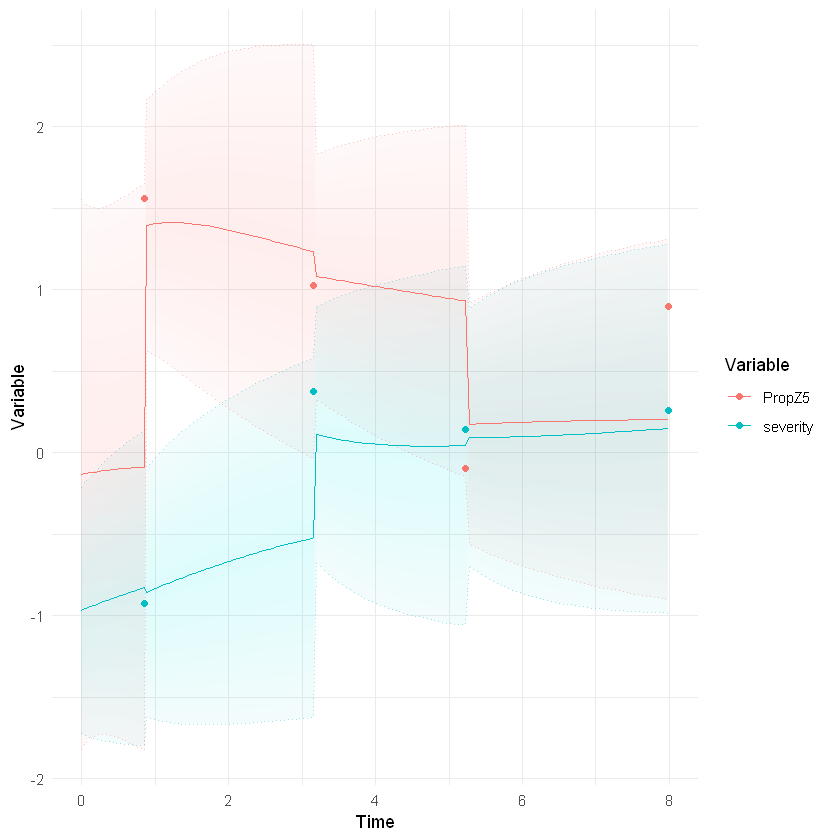

In [18]:
ctKalman(fit_mvtha,subjects=c(300,400),plot=T,kalmanvec=c('y','yprior'), polygonsteps=10)

#get Standardize residuals
df_res = ctStanKalman(fit_mvtha, standardisederrors=TRUE)
dim(df_res)
#write.csv(df_res, file=file.path(path_save_,paste0(name,"df_standardized_residual.csv")))

In [19]:
df_res = ctKalman(fit_mvtha,subjects=fit_mvtha$setup$idmap[,1],plot=F)#,kalmanvec=c('y','yprior'))
dim(df_res)
write.csv(df_res, file=file.path(path_save_,paste0(name,"df_res_yprior.csv")))

Computing state estimates..

Computing quantities for 1 samples...



[1] 9548118      11

Computing quantities for 1500 samples...

Generating data from posterior

Using 2/12 logical CPU cores



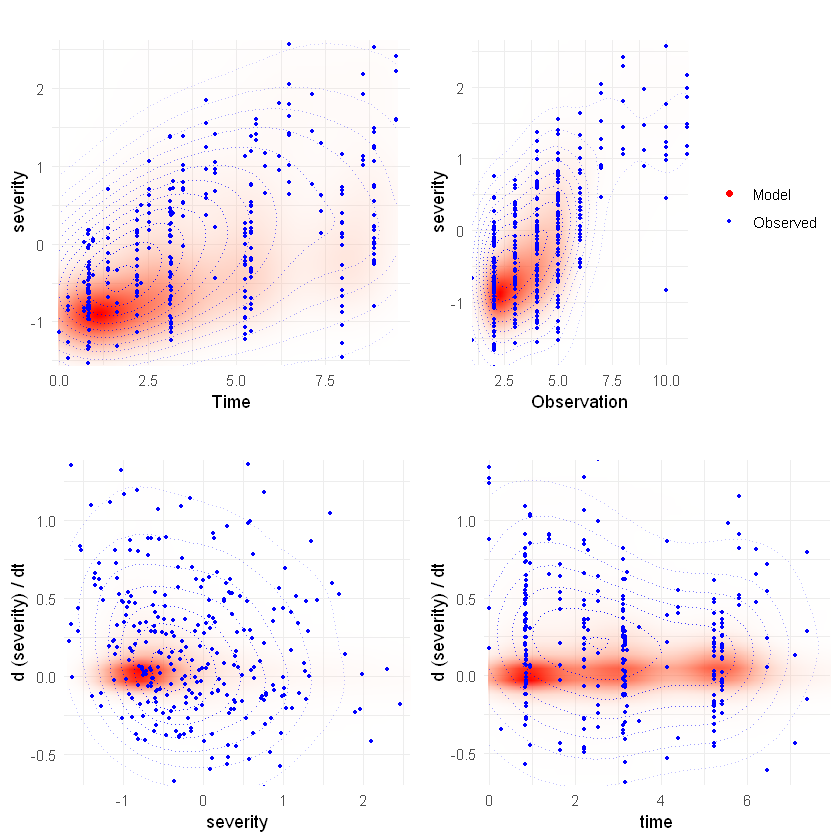

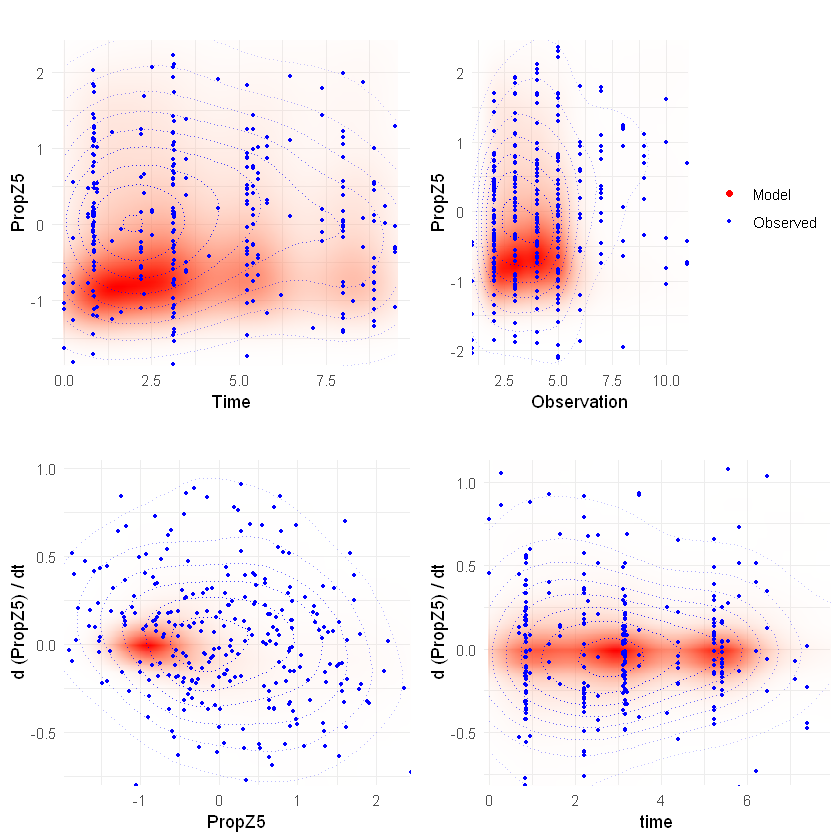

NULL

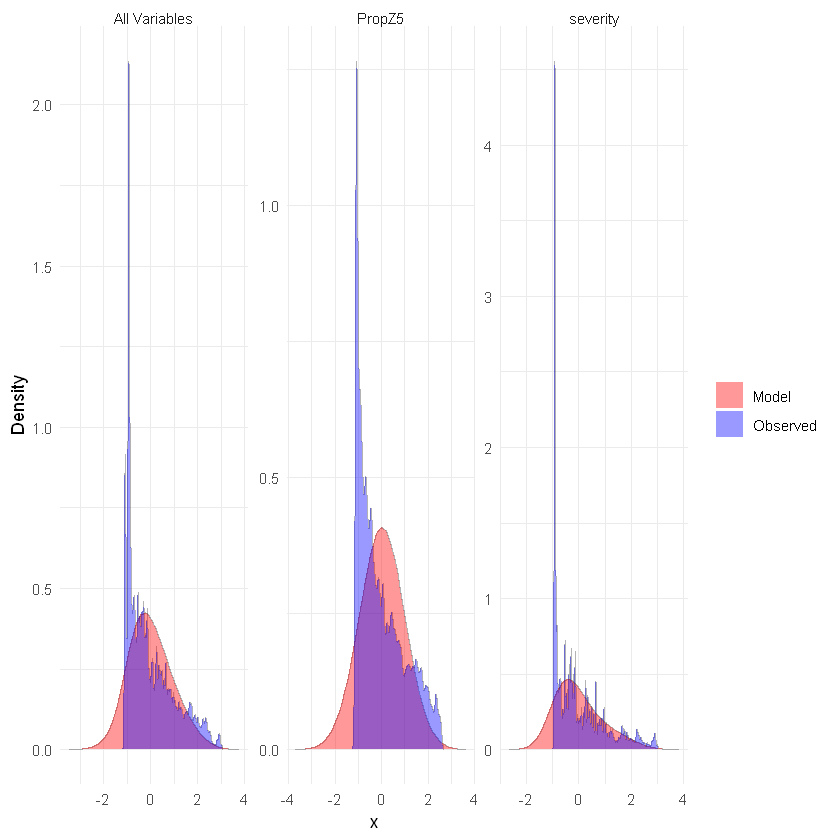

In [20]:
#compare randomly generated data from posterior to observed data
ctStanPostPredict(fit_mvtha, wait=FALSE)

In [21]:
x = ctStanDiscretePars(fit_mvtha, subjects='popmean')
#ctStanDiscreteParsPlot(x, indices='CR',facets='Subject')
write.csv(as.data.frame(x), file=file.path(path_save_,paste0(name,"ctStanDiscretePars.csv")))

Computing temporal regression coefficients for 100 samples, may take a moment...



In [22]:
#K fold cross validation for ctStanFit objects
#"folds Number of cross validation splits to use – 3 folds implies that the model is re-fit 3 times, each time to a data set 
#with 1/3 of the observations randomly removed"
loores = ctLOO(fit_mvtha, folds = folds_, cores = cores_, subjectwise=TRUE)
for (i in folds_){
    df_fold = loores$foldrows[as.character(i-1)]
    write.csv(df_fold, file=file.path(path_save_,paste0(name,'df_',i,"fold.csv")))}
df_foldpars = loores$foldpars
write.csv(df_foldpars, file=file.path(path_save_,paste0(name,"df_foldpars.csv")))
df_sampleloglikrow = data.frame('out'=loores$outsampleLogLikRow,'in'=c(loores$insampleLogLikRow))
write.csv(df_sampleloglikrow, file=file.path(path_save_,paste0(name,"df_sampleloglikrow.csv")))
df_resloo = data.frame('insampleLogLik' = loores$insampleLogLik,
           'outsampleLogLik' = loores$outsampleLogLik,
           'outsampleLogLik' = loores$insampleRowwiseEntropy,
           'outsampleRowwiseEntropy' = loores$outsampleRowwiseEntropy,
           'insampleSubjectwiseEntropy' = loores$insampleSubjectwiseEntropy,
           'outsampleSubjectwiseEntropy' = loores$outsampleSubjectwiseEntropy,
           'insampleRowwiseLogLikSD' = loores$insampleRowwiseLogLikSD,
           'outsampleRowwiseLogLikSD' = loores$outsampleRowwiseLogLikSD,
           'insampleSubjectwiseLogLikSD' = loores$insampleSubjectwiseLogLikSD,
           'outsampleSubjectwiseLogLikSD' = loores$outsampleSubjectwiseLogLikSD)
write.csv(df_resloo, file=file.path(path_save_,paste0(name,"df_resloo.csv")))
##
fit_mvtha$cv =ctLOO(fit_mvtha, folds = folds_, cores = cores_, subjectwise=TRUE)
save(fit_mvtha,file=file.path(path_save_,'fit_mvtha.rda'))

Using 5/12 available CPU cores

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

Using 5/12 available CPU cores

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

Using 5/12 logical CPU cores

Optimizing...

Finishing optimization...

